# 广东2022年7月清洁与污染个例
## `GZ_2207 Clean & Pollute`

---
*@author: Evan*\
*@date: 2022-11-03*

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import os
import xarray as xr

In [2]:
# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [3]:
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'], # simsun字体中文版就是宋体
}
rcParams.update(config)

## 读取数据

In [2]:
GridFile=xr.open_dataset('F:/Data/caseGZ_2207/GRIDCRO2D_d03.nc')
lat=np.squeeze(GridFile.LAT)
lon=np.squeeze(GridFile.LON)

In [3]:
pa=xr.open_dataset('F:/Data/caseGZ_2207/pa_IRR.nc')
pa

<xarray.Dataset>
Dimensions:  (time: 336, level: 38, y: 110, x: 152)
Coordinates:
  * time     (time) datetime64[ns] 2022-07-15 ... 2022-07-28T23:00:00
  * level    (level) int32 0 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35 36 37
    lat      (y, x) float32 ...
    lon      (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    O3_prod  (time, level, y, x) float64 ...
    O3_loss  (time, level, y, x) float64 ...
    HNO3     (time, level, y, x) float64 ...
    H2O2     (time, level, y, x) float64 ...
Attributes:
    description:  get from CMAQ with PA_IRR

In [5]:
prod=pa.O3_prod
loss=pa.O3_loss
HNO3=pa.HNO3
H2O2=pa.H2O2

prod.shape

(336, 38, 110, 152)

In [6]:
O3p_L1=np.squeeze(prod[:,0,:,:])
O3p_L2=np.squeeze(prod[:,18,:,:])
O3l_L1=np.squeeze(loss[:,0,:,:])
O3l_L2=np.squeeze(loss[:,18,:,:])
# H2O2_prod=np.squeeze(H2O2[:,:,:,:])
# HNO3_prod=np.squeeze(HNO3[:,:,:,:])

print('whole =',O3p_L1.shape)

whole = (336, 110, 152)


## 绘图

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
import datetime

In [8]:
shp_CN=Reader('D:/files/Master/02学术/Boundary/全国省市县九段线/省级、地市级、县市级行政区划/bou2_4p.shp')
shp_SCS=Reader('D:/files/Master/02学术/Boundary/全国省市县九段线/南海诸岛/bou2_4p.shp')
shp_GD=Reader('D:/files/Master/02学术/Boundary/地形边界/Gdbound/gdboudiv_arc.shp')
shp_HK=Reader('D:/files/Master/02学术/Boundary/行政边界/HK/HK.shp')
shp_MC=Reader('D:/files/Master/02学术/Boundary/行政边界/MC/MC.shp')
shp_GZ=Reader('D:/files/Master/02学术/Boundary/全国省市县九段线/广州市/广州市.shp')

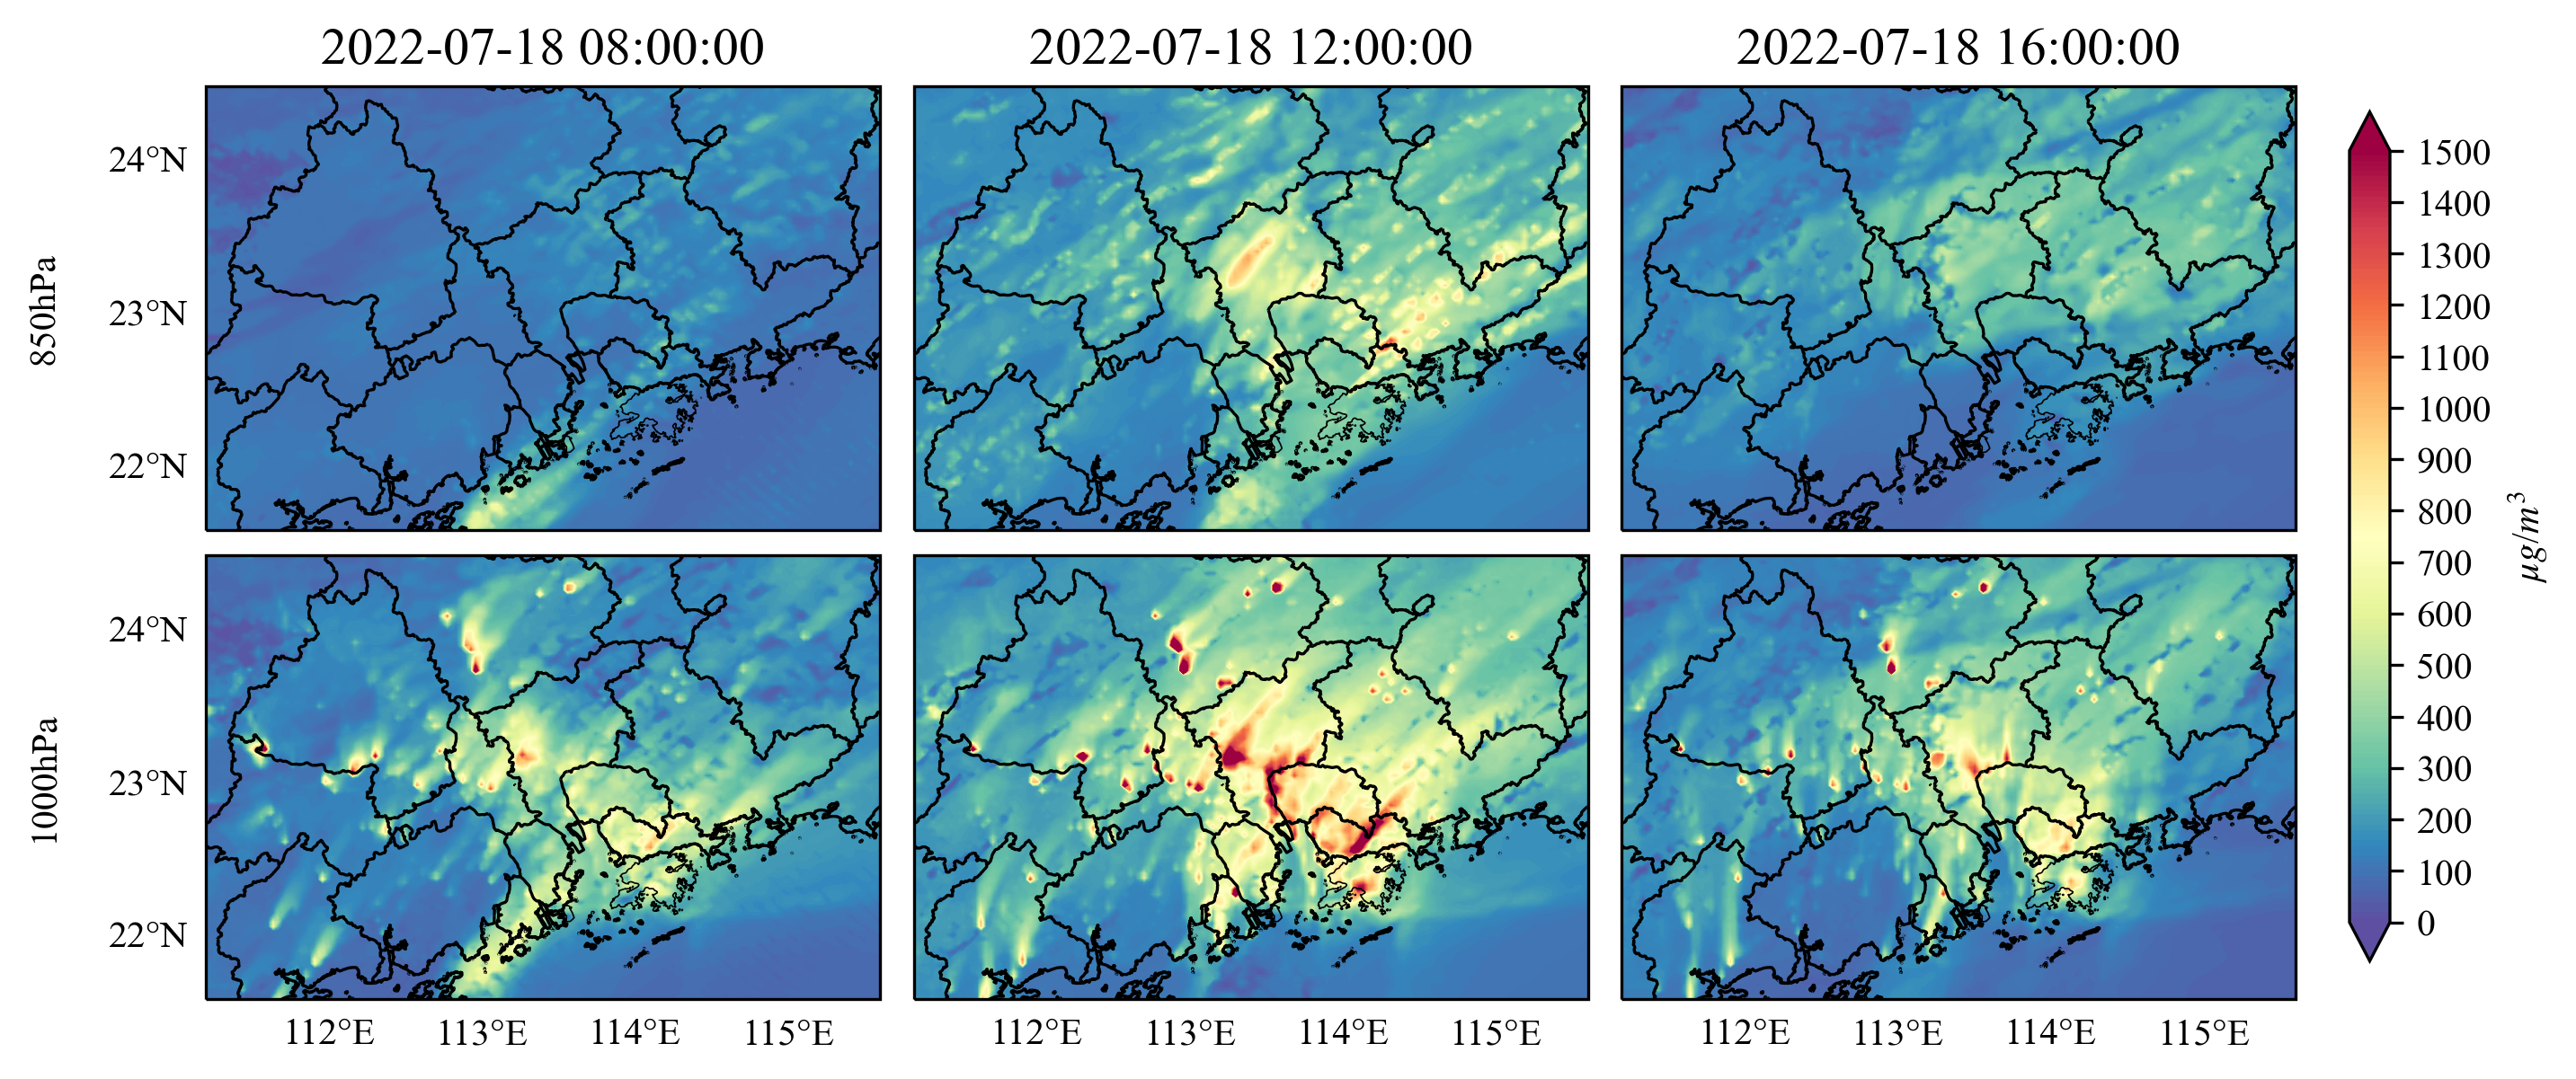

In [14]:
date=np.array([18,18,18])
hour=np.array([8,12,16])

cmax=1501
cmaplevel=np.arange(0,cmax,10)
proj=ccrs.PlateCarree()
proj_shp=ccrs.PlateCarree()
fig = plt.figure(figsize=(10,4.5),dpi=300)
ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

for j in range(3):
    tstep=(date[j]-15)*24+hour[j]

    # ----------------1000hPa----------------
    # SHP Lines
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

    ax[1][j].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())

    # contour map
    cmap=ax[1][j].contourf(lon,lat,O3p_L1[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')
    
    #  set titles
    ax[1][j].set_title('')

    # ----------------850hPa----------------
    # SHP Lines
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

    ax[0][j].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())

    # contour map
    cmap=ax[0][j].contourf(lon,lat,O3p_L2[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')

    # set titles
    ax[0][j].set_title(str(datetime.datetime(2022,7,date[j],hour[j])),size=14)

    # set tick
    gl=ax[1][j].gridlines(
        xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False
    gl.left_labels=False

    if (j==0):
        gl=ax[0][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.bottom_labels=False
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.bottom_labels=False

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
position= fig.add_axes([0.92,0.15,0.015,0.7])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax,100))
cbar.set_label('$\mu$$g$/$m^3$')

# set axis label
plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

# plt.suptitle('O3 at '+str(datetime.datetime(2021,3,date,hour)),size=14)

# save tiff
# path='D:/files/Master/02学术/Case/Shaog03/投稿文章/用图/TIF/'
# plt.savefig(path+'O3_h2.tif',dpi=300,bbox_inches='tight')

plt.show()

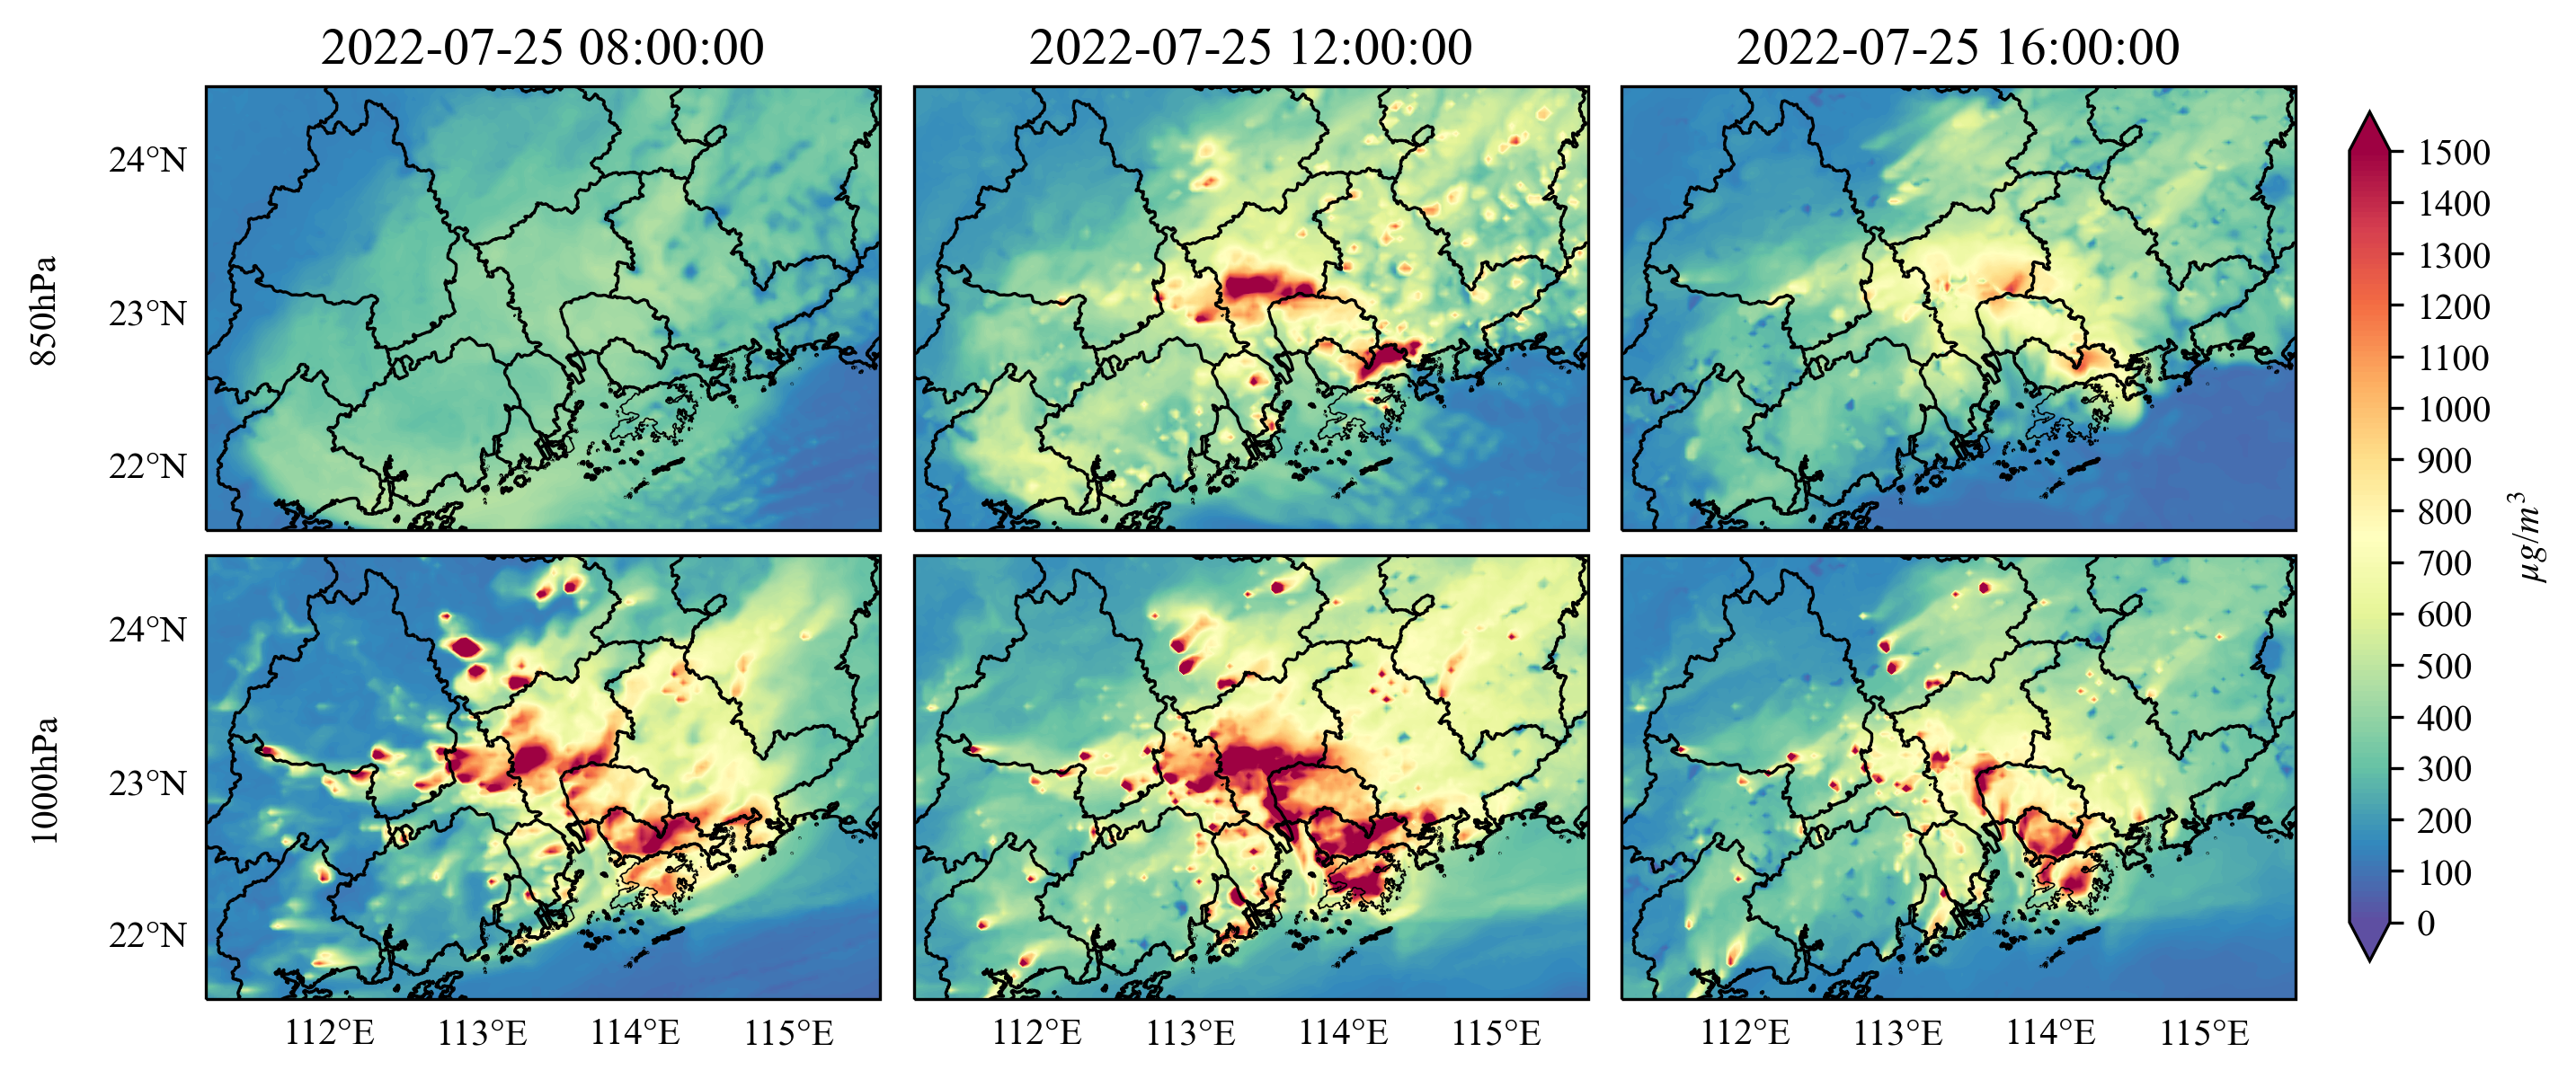

In [15]:
date=np.array([25,25,25])
hour=np.array([8,12,16])

cmax=1501
cmaplevel=np.arange(0,cmax,10)
proj=ccrs.PlateCarree()
proj_shp=ccrs.PlateCarree()
fig = plt.figure(figsize=(10,4.5),dpi=300)
ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

for j in range(3):
    tstep=(date[j]-15)*24+hour[j]

    # ----------------1000hPa----------------
    # SHP Lines
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

    ax[1][j].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())

    # contour map
    cmap=ax[1][j].contourf(lon,lat,O3p_L1[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')
    
    #  set titles
    ax[1][j].set_title('')

    # ----------------850hPa----------------
    # SHP Lines
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

    ax[0][j].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())

    # contour map
    cmap=ax[0][j].contourf(lon,lat,O3p_L2[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')

    # set titles
    ax[0][j].set_title(str(datetime.datetime(2022,7,date[j],hour[j])),size=14)

    # set tick
    gl=ax[1][j].gridlines(
        xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False
    gl.left_labels=False

    if (j==0):
        gl=ax[0][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.bottom_labels=False
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.bottom_labels=False

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
position= fig.add_axes([0.92,0.15,0.015,0.7])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax,100))
cbar.set_label('$\mu$$g$/$m^3$')

# set axis label
plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

# plt.suptitle('O3 at '+str(datetime.datetime(2021,3,date,hour)),size=14)

# save tiff
# path='D:/files/Master/02学术/Case/Shaog03/投稿文章/用图/TIF/'
# plt.savefig(path+'O3_h2.tif',dpi=300,bbox_inches='tight')

plt.show()